🍓🍓🍓dp的表格总是正推；状态转移方程总是反推

## 53. 最大子序和

输入: [-2,1,-3,4,-1,2,1,-5,4]
    
输出: 6

解释: 连续子数组 [4,-1,2,1] 的和最大，为 6。

In [16]:
class Solution(object):
    def maxSubArray(self, nums):
        n = len(nums)
        dp = [0 for _ in range(n)]
        for i in range(n):
            dp[i] = max(dp[i-1]+nums[i], nums[i])
#             print(dp)
        return max(dp)

In [17]:
nums =  [-2,1,-3,4,-1,2,1,-5,4]
a = Solution()
a.maxSubArray(nums)

6

## 70. 爬楼梯

输入： 3

输出： 3

解释： 有三种方法可以爬到楼顶。

1.  1 阶 + 1 阶 + 1 阶
2.  1 阶 + 2 阶
3.  2 阶 + 1 阶

递归，但是超时了

In [26]:
class Solution(object):
    def climbStairs(self, n):
        if n == 1 or n == 0:  # 终止条件 
            return 1
        
        return self.climbStairs(n-1)+self.climbStairs(n-2)

动态规划，构造dp表
1. 状态：构造dp表格表示第n阶台阶有dp[n]种走法
2. 最优子状态：n的状态只于n-1和n-2时有关，dp[n] = f(dp[n-1], dp[n-2])
3. 状态转移矩阵：易得，从dp[n-1]可以再走一步到dp[n]，从dp[n-2]可以再走两步到dp[n]，所以dp[n]的走法应该是二者走法的数值之和。dp[n] = dp[n-1]+dp[n-2]


In [43]:
class Solution(object):
    def climbStairs(self, n):
        dp = [0 for _ in range(n+1)]
        dp[0], dp[1] = 1, 1 
        for i in range(2, n+1):
            dp[i] = dp[i-1]+dp[i-2]
            print(dp)
        return dp[-1]

In [44]:
a = Solution()
a.climbStairs(3)

[1, 1, 2, 0]
[1, 1, 2, 3]


3

## 198. 打家劫舍

输入：[1,2,3,1]

输出：4

解释：偷窃 1 号房屋 (金额 = 1) ，然后偷窃 3 号房屋 (金额 = 3)。
     偷窃到的最高金额 = 1 + 3 = 4 。

动态规划：
1. 子问题：
 f(k) = 偷 [0..k) 房间中的最大金额

2. 转移方程：
f(k) = max{ rob(k-1), nums[k-1] + rob(k-2)

3. 边界：
f(0) = 0
f(1) = nums[0]

⚠️n和n+1why？？？

In [79]:
class Solution(object):
    def rob(self, nums):
        n = len(nums)
        dp = [0 for _ in range(n+1)]
        dp[0] = 0
        dp[1] = nums[0]
        for i in range(2, n+1):
            dp[i] = max(dp[i-1], dp[i-2]+nums[i-1])
            
        return max(dp)

In [78]:
nums = [2,7,9,3,1]
a = Solution()
a.rob(nums)

12

## 5. 最长回文子串

输入: "babad"

输出: "bab"

注意: "aba" 也是一个有效答案。

动态规划
1. 状态：dp[left:right]
2. 最优子解：dp[left-1:right+1] = g(dp[left:right])
3. 状态转移方程：if s[left]==s[right]: left--;right++
🍓🍓🍓：
1. 关于中心字母的对称和关于中心线的对称
2. return的是s[left+1:right]，因为如果left=0时会变成-1的索引

In [34]:
class Solution(object):
    def longestPalindrome(self, s):
        if s == s[::-1]: return s
        res = s[:1]  # 不用从空字符串开始，因为‘a’也是回文
        for i in range(len(s)):
            palin_odd = self.spread(s, i, i)
            palin_even = self.spread(s, i, i+1)  # 🍓🍓🍓
#             print(palin_odd, palin_even, res)
            res = max(palin_odd, palin_even, res, key=len)
            
        return res
    
    def spread(self, s, left, right):
        p = ''
        while left >= 0 and right < len(s) and s[left] == s[right]:  # 🍓🍓🍓left=0注意开头的情况
            p = s[left:right+1]  # 🍓🍓🍓索引接下来会变
            left -= 1  
            right += 1
            print(left, right, s[left:right+1], s[left+1:right])
        return p
#         return s[left+1:right]  # 等同

In [35]:
s = 'abag'
a = Solution()
a.longestPalindrome(s)

-1 1  a
0 2 aba b
-1 3 g aba
1 3 bag a
2 4 ag g


'aba'

## 62. 不同路径
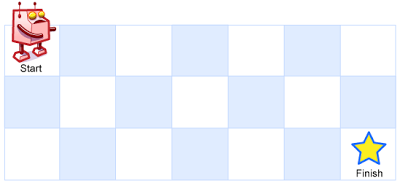
输入：m = 3, n = 7

输出：28

解释：
从左上角开始，总共有 28 条路径可以到达右下角。

动态规划：
1. 状态：dp[i][j]
2. 最优子解：dp[i][j] = g(dp[i-1][j], dp[i][j-1])
3. 状态转移方程：dp[i][j] = dp[i-1][j] + dp[i][j-1]
4. 边界：第一列、第一行为1

时间复杂度：$O(M\times N)$

空间复杂度：$O(M\times N)$

In [39]:
class Solution(object):
    def uniquePaths(self, m, n):
        dp = [[1]*n ]+([[1]+[0]*(n-1)])*(m-1)
        for i in range(1, m):
            for j in range(1, n):
                dp[i][j] = dp[i-1][j] + dp[i][j-1]
        return dp[-1][-1]

In [43]:
m = 3
n = 7
a = Solution()
a.uniquePaths(m, n)

28

## 279. 完全平方数
输入: n = 13

输出: 2

解释: 13 = 4 + 9.

动态规划：
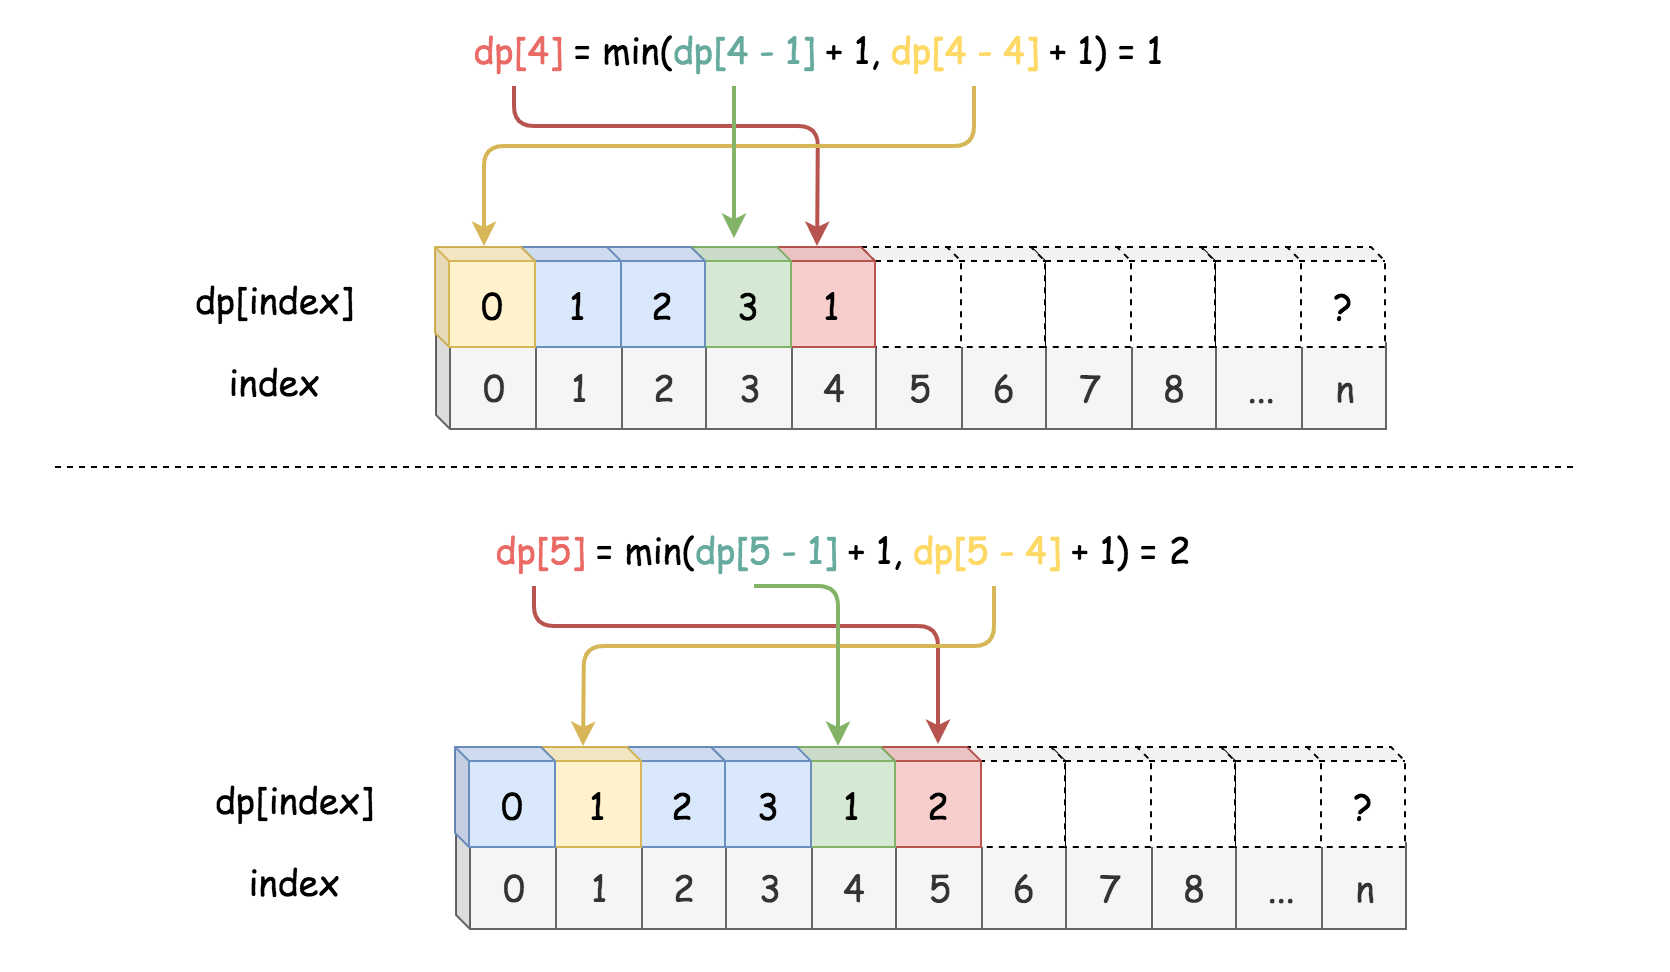
1. 状态：dp[i]
2. 最优子解：dp[i] = g(dp[i-K])
3. 状态转移方程：dp[i] = dp[i-K] + 1
4. 边界：dp[0] = 0

时间复杂度：$O(N)$

空间复杂度：$O(1)$

In [63]:
class Solution(object):
    def numSquares(self, n):
        """
        :type n: int
        :rtype: int
        """
        square_nums = [i**2 for i in range(0, int(math.sqrt(n))+1)]
        dp = [float('inf')] * (n+1)
        dp[0] = 0
        
        for i in range(1, n+1):
            for square in square_nums:
                if i < square:
                    break
                dp[i] = min(dp[i], dp[i-square] + 1)
        
        return dp[-1]

🍓🍓🍓：此方法不行，因为“每次减去最大的一个平方数”的算法不一定是步骤最少的情况

In [62]:
import numpy as np
n = 12
sqrt = int(np.sqrt(n))
dp = list()
for i in range(1, sqrt+1):
    dp.append(i*i)
res = n
i = sqrt-1
cnt = 0
while res >= 0 and i > 0:
    print(f'i = {i}, res = {res}')

    if res > dp[i]:
        res -= dp[i]
        cnt += 1
        
    else:
        i -= 1
print(cnt+1)    

i = 2, res = 12
i = 2, res = 3
i = 1, res = 3
2


## 91. 解码方法
输入：s = "226"

输出：3

解释：它可以解码为 "BZ" (2 26), "VF" (22 6), 或者 "BBF" (2 2 6) 。


### 方法1

In [83]:
def numDecodings(self, s: str) -> int:
    if s.startswith('0'):  # 开头有 ‘0’ 直接返回
        return 0

    n = len(s)
    dp = [1] * (n+1)  # 重点是 dp[0], dp[1] = 1, 1

    for i in range(2, n+1):
        if s[i-1] == '0' and s[i-2] not in '12':  # 出现前导 ‘0’ 的情况，不能解码，直接返回
            return 0
        if s[i-2:i] in ['10', '20']:  # 只有组合在一起才能解码
            dp[i] = dp[i-2]
        elif '10' < s[i-2:i] <= '26': # 两种解码方式
            dp[i] = dp[i-1] + dp[i-2]
        else:                         # '01'到 ‘09’ 或 > '26'，只有单独才能解码
            dp[i] = dp[i-1]
    return dp[n]


### 方法2
判断两个状态：与上一个合并/不合并
1. 状态:合并join[i]和不合并nojoin[i]
2. 最优子解：$join[i] = g(join[i-1], nojoin[i])$, $nojoin[i] = g(join[i-1], nojoin[i])$
3. 状态转移方程：如果s[i-1:i+1]在0～26之间：$join[i] = nojoin[i-1]$(保持不变)；

如果s[i]不为0：$nojoin[i] = join[i-1] + nojoin[i]$（增加）
4. 边界$join[0]=0, nojoin[0]=1$

In [84]:
class Solution:
    def numDecodings(self, s):
        n = len(s)
        if s[0] == '0' or n == 0: return 0  # 🍓🍓🍓：注意‘01’的情况
        dp = [[0, 0]for _ in range(n)]
        dp[0][1] = 1
        for i in range(1, n):
            if s[i-1:i+1]>='10' and s[i-1:i+1]<='26':  # 合并
                dp[i][0] = dp[i-1][1]
#                 print('okk')
            if s[i] != '0':
                dp[i][1] = dp[i-1][0]+dp[i-1][1]  # 不合并
#             print(s[i], dp)
        return dp[-1][1]+dp[-1][0]

In [82]:
s = '121034'
a = Solution()
a.numDecodings(s)

okk
2 [[0, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0]]
okk
1 [[0, 1], [1, 1], [1, 2], [0, 0], [0, 0], [0, 0]]
okk
0 [[0, 1], [1, 1], [1, 2], [2, 0], [0, 0], [0, 0]]
3 [[0, 1], [1, 1], [1, 2], [2, 0], [0, 2], [0, 0]]
4 [[0, 1], [1, 1], [1, 2], [2, 0], [0, 2], [0, 2]]


2

简化

In [77]:
class Solution:
    def numDecodings(self, s):
        n = len(s)
        if n==0: return 0
        dp = [1,0]
        dp[1] = 1 if s[0]!='0' else 0 
        for i in range(1,n):
            dp.append(0)
            if s[i]!='0':
                dp[i+1] += dp[i]
            if s[i-1:i+1]>='10' and s[i-1:i+1]<='26':
                dp[i+1] += dp[i-1]
        
        return dp[-1]

## 131. 分割回文串

dp

In [ ]:
class Solution:
    def partition(self, s: str) -> List[List[str]]:
        if s == "":
            return []
        ans = [[s[0]] ]
        for i in range(1, len(s)):
            curr = s[i]
            newAns = []
            for item in ans:
                newAns.append(item + [curr])
                if item[-1] == curr:
                    newAns.append(item[0:-1] + [item[-1] + curr])
                if len(item) >= 2 and item[-2] == curr:
                    newAns.append(item[0:-2] + [item[-2] + item[-1] + curr])
            ans = newAns 
        return ans

作者：bei-ta-s
链接：https://leetcode-cn.com/problems/palindrome-partitioning/solution/chao-jian-dan-yi-dong-de-dong-tai-gui-hua-fa-by-be/
来源：力扣（LeetCode）
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

递归

In [ ]:
class Solution:
    def partition(self, s: str) -> List[List[str]]:
        if not s:
            return [[]]
        if len(s) == 1:
            return [[s]]
        ret = []
        for i in range(1, len(s)+1):
            if s[:i][::-1] == s[:i]:
                ret += [[s[:i]]+j for j in self.partition(s[i:])]
        return ret

作者：ting-ting-28
链接：https://leetcode-cn.com/problems/palindrome-partitioning/solution/python3-di-gui-jian-dan-yi-dong-by-ting-ting-28/
来源：力扣（LeetCode）
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

## 322. 零钱兑换
步长可变的爬楼梯问题

动态规划：
1. 状态：dp[i]
2. 最优子解：dp[i] = g(dp[i-C])
3. 状态转移方程：dp[i] = min(dp[i], dp[i-K] + 1)
4. 边界：dp[0] = 0

时间复杂度：$O(N)$

空间复杂度：$O(1)$

In [89]:
class Solution:
    def coinChange(self, coins, amount):
        dp = [float('inf')] * (amount + 1)
        dp[0] = 0
        
        for coin in coins:
            for x in range(coin, amount + 1):
                dp[x] = min(dp[x], dp[x - coin] + 1)
                print(coin, x, dp)
        return dp[amount] if dp[amount] != float('inf') else -1 


In [90]:
coins = [1, 3, 5]
amount = 11
a = Solution()
a.coinChange(coins, amount)

1 1 [0, 1, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
1 2 [0, 1, 2, inf, inf, inf, inf, inf, inf, inf, inf, inf]
1 3 [0, 1, 2, 3, inf, inf, inf, inf, inf, inf, inf, inf]
1 4 [0, 1, 2, 3, 4, inf, inf, inf, inf, inf, inf, inf]
1 5 [0, 1, 2, 3, 4, 5, inf, inf, inf, inf, inf, inf]
1 6 [0, 1, 2, 3, 4, 5, 6, inf, inf, inf, inf, inf]
1 7 [0, 1, 2, 3, 4, 5, 6, 7, inf, inf, inf, inf]
1 8 [0, 1, 2, 3, 4, 5, 6, 7, 8, inf, inf, inf]
1 9 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, inf, inf]
1 10 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, inf]
1 11 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
3 3 [0, 1, 2, 1, 4, 5, 6, 7, 8, 9, 10, 11]
3 4 [0, 1, 2, 1, 2, 5, 6, 7, 8, 9, 10, 11]
3 5 [0, 1, 2, 1, 2, 3, 6, 7, 8, 9, 10, 11]
3 6 [0, 1, 2, 1, 2, 3, 2, 7, 8, 9, 10, 11]
3 7 [0, 1, 2, 1, 2, 3, 2, 3, 8, 9, 10, 11]
3 8 [0, 1, 2, 1, 2, 3, 2, 3, 4, 9, 10, 11]
3 9 [0, 1, 2, 1, 2, 3, 2, 3, 4, 3, 10, 11]
3 10 [0, 1, 2, 1, 2, 3, 2, 3, 4, 3, 4, 11]
3 11 [0, 1, 2, 1, 2, 3, 2, 3, 4, 3, 4, 5]
5 5 [0, 1, 2, 1, 2, 1, 2, 3, 4, 3, 4, 5]
5 6 [0,

3